In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Task 1

In this task, you need to download this dataset. Here you will find 2 files - one with a two-dimensional dataset and the other with the mnist dataset. Apply the K-means algorithm to cluster each of them. To find the optimal number of clusters, use the elbow method.

1.  Read in the 2D data and MNIST data from CSV files

In [2]:
data_2d = pd.read_csv("data/data_2d.csv")
data_mnist = pd.read_csv("data/mnist.csv")

2. Define a function to perform the Elbow Method for K-means clustering

In [3]:
def kmeans_elbow_method(data, max_clusters=15):
    distortion = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, n_init=10).fit(data)
        distortion.append(kmeans.inertia_)

    plt.plot(range(1, max_clusters + 1), distortion)
    plt.title("Elbow Method for K-means")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Distortion")
    plt.show()

3. Define a function to apply Principal Component Analysis (PCA) to the data

In [4]:
def apply_pca(data, n_components=2):
    pca = PCA(n_components=n_components)
    transformed_data = pca.fit_transform(data)
    return transformed_data

4.  Apply PCA to the MNIST data with 2 components and perform the Elbow Method

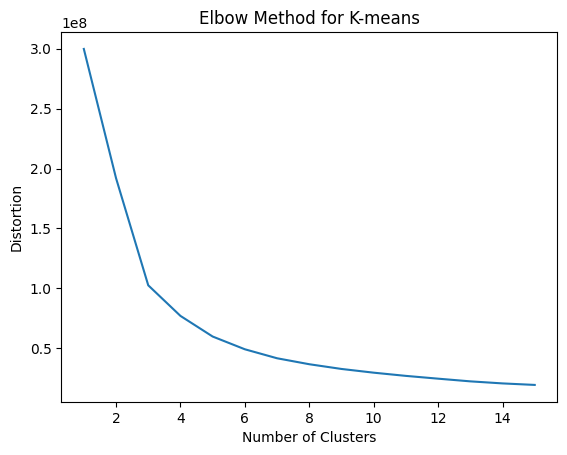

In [5]:
pca_data_mnist = apply_pca(data_mnist)
kmeans_elbow_method(pca_data_mnist)

5. Perform the Elbow Method on the 2D data

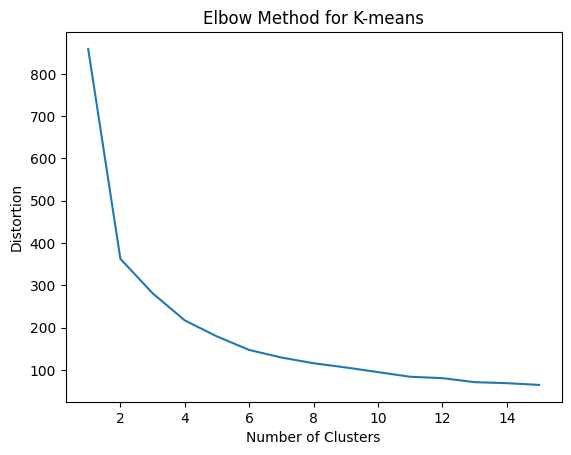

In [6]:
kmeans_elbow_method(data_2d)

### Task 2

Visualize the clustering results. In the case of the mnist dataset, you also need to use the PCA algorithm to reduce the dimensionality of your data to a 2-dimensional version.

1. Define a function to visualize clustering results

In [7]:
def show_clustering(data, k, random_state=0):
    kmeans = KMeans(n_clusters=k, random_state=random_state, n_init=10).fit(data)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=kmeans.labels_, palette='cool', legend='full')
    sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color='black', marker='x', s=100)
    
    plt.title(f'K-means Clustering (k={k})')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend(title='Cluster')
    plt.show()

2. Apply PCA to the 2D data and visualize clustering with k=2

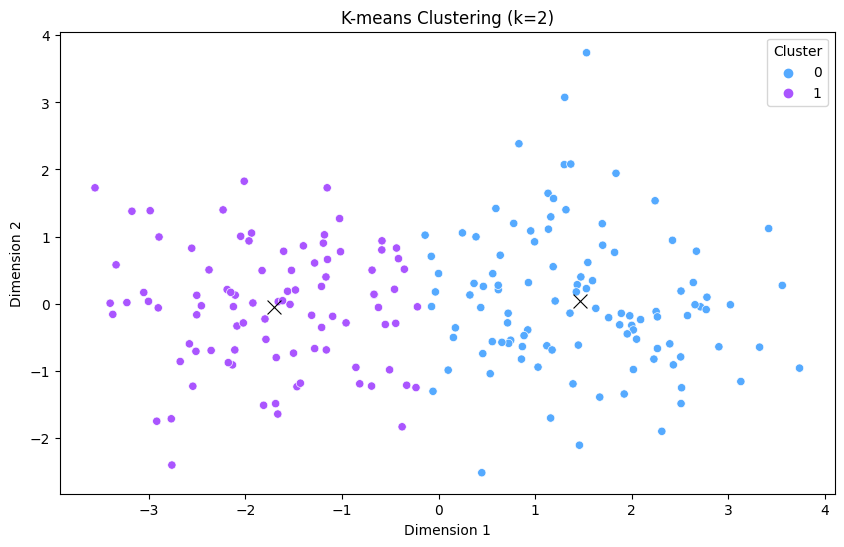

In [8]:
pca_data_2d = PCA(n_components=2).fit_transform(data_2d)
show_clustering(pca_data_2d, k=2)

3. Visualize clustering of PCA-transformed MNIST data with k=3

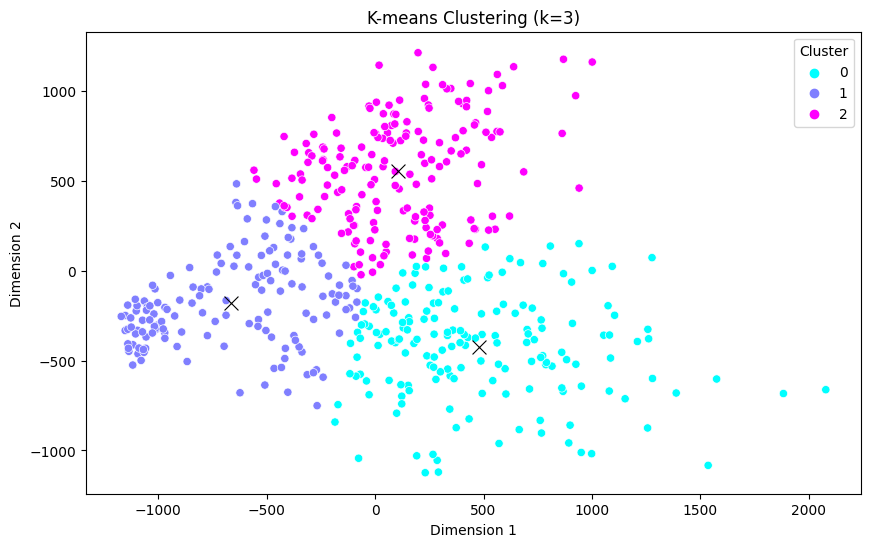

In [9]:
show_clustering(pca_data_mnist, k=3)